## Heart failure prediction using ANN

Import libraries

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load data

In [153]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [154]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


check missing values

In [155]:
data.isnull().sum() # No missing value

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

check outliers

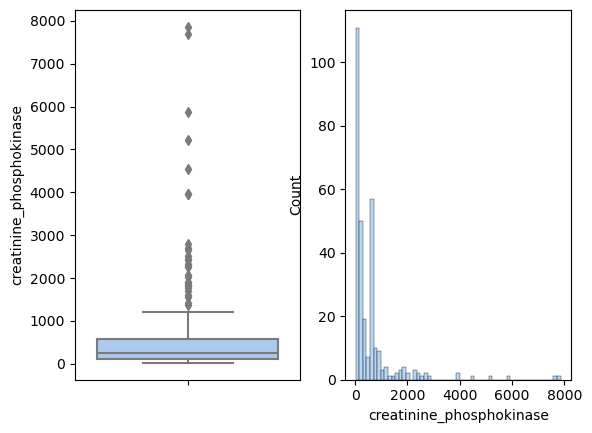

True    270
Name: cp_non_outliers, dtype: int64

In [156]:
# Visualising outliers for "creatinine_phosphokinase"
figure, ax = plt.subplots(1, 2, squeeze = False)
sns.boxplot(ax = ax[0,0], y = data["creatinine_phosphokinase"])
sns.histplot(ax = ax[0,1], x = data["creatinine_phosphokinase"])
plt.show()

# Defining Outliers
Q1 = data["creatinine_phosphokinase"].quantile(0.25)
Q3 = data["creatinine_phosphokinase"].quantile(0.75)
IQR = Q3 - Q1    # IQR is interquartile range
outlier_ll = Q1 - 1.5 * IQR
outlier_ul = Q3 + 1.5 * IQR

# Counting Outliers
non_outliers = (data["creatinine_phosphokinase"] >= outlier_ll) & (data["creatinine_phosphokinase"] <= outlier_ul)
non_outliers.value_counts() # True = 270, False = 28
data["cp_non_outliers"] = non_outliers

# Drop rows of ouliers for "creatinine_phosphokinase" column
data.drop(data[data["cp_non_outliers"] == False].index, axis = 0, inplace = True)
# Checking
data["cp_non_outliers"].value_counts() # True = 270

### Data Visualisations

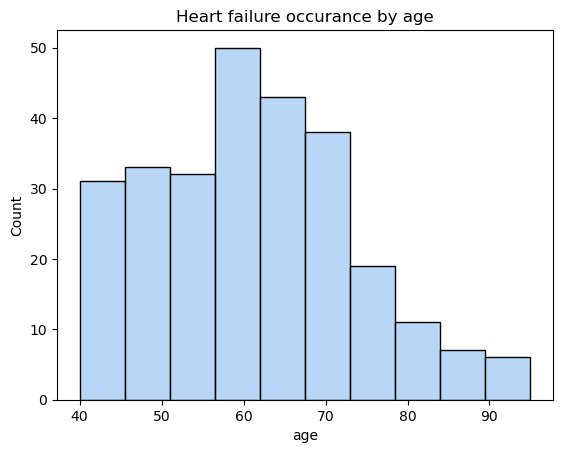

In [157]:
# Heart failure occurance by age
sns.histplot(data = data, x = data["age"])
plt.title("Heart failure occurance by age")
plt.show()

# Late 50s to early 70s are most frequent

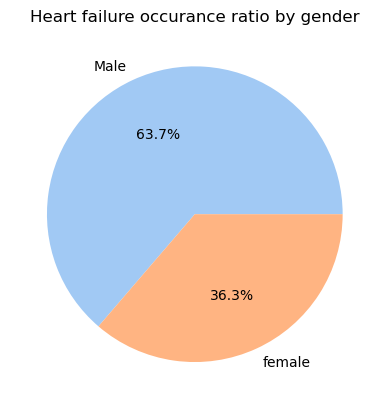

In [158]:
# Heart failure occurance ratio by gender
plt.pie(data["sex"].value_counts(), labels = ["Male", "female"], autopct = "%1.1f%%")
plt.title("Heart failure occurance ratio by gender")
plt.show()